In [1]:
import os
import sys

# backend 디렉토리를 Python path에 추가
backend_path = os.path.join(os.getcwd(), 'backend')
if backend_path not in sys.path:
    sys.path.insert(0, backend_path)

print(f"Added to sys.path: {backend_path}")

Added to sys.path: c:\Users\asdr1\Desktop\study\KT_CS\realtime-assist-agent\backend\backend


In [5]:
from langchain_openai import ChatOpenAI
from agent import create_agent_graph
from IPython.display import Image, display
from dotenv import load_dotenv

load_dotenv()

True

In [6]:
# LLM 초기화 (시스템 프롬프트와 함께)
llm = ChatOpenAI(
    model="gpt-5-mini",
    temperature=0.3,
    streaming=True
).bind(
    system="당신은 고객 상담 대화를 실시간으로 요약하는 AI 어시스턴트입니다. "
            "대화 내용을 간결하고 핵심적으로 요약하여 상담사가 빠르게 파악할 수 있도록 해주세요."
)

print("✅ LLM initialized")

✅ LLM initialized


In [7]:
# 에이전트 그래프 생성
graph = create_agent_graph(llm)

print("✅ Agent graph created")
print(f"Graph type: {type(graph)}")

✅ Agent graph created
Graph type: <class 'langgraph.graph.state.CompiledStateGraph'>


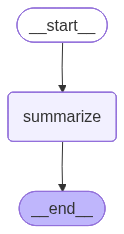

✅ Graph visualization successful!


In [8]:
try:
    # 그래프를 PNG 이미지로 렌더링
    graph_image = graph.get_graph().draw_mermaid_png()
    
    # 이미지 표시
    display(Image(graph_image))
    
    print("✅ Graph visualization successful!")
    
except Exception as e:
    print(f"❌ Graph visualization failed: {e}")
    print("\nTrying alternative method...")
    
    # 대안: ASCII로 그래프 구조 출력
    try:
        print("\nGraph Structure (ASCII):")
        print(graph.get_graph())
    except Exception as e2:
        print(f"❌ Alternative method also failed: {e2}")
        print("\n📝 Graph structure (from source code):")
        print("START → summarize → END")

In [10]:
try:
    # 그래프 이미지 생성
    graph_image = graph.get_graph().draw_mermaid_png()
    
    # 파일로 저장
    output_path = "agent_graph.png"
    with open(output_path, "wb") as f:
        f.write(graph_image)
    
    print(f"✅ Graph saved to: {output_path}")
    
except Exception as e:
    print(f"❌ Failed to save graph: {e}")

✅ Graph saved to: agent_graph.png
